In [1]:
import numpy as nm
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

In [2]:
dataset=pd.read_csv(r"C:\Users\hegde\Downloads\User_Data.csv")

In [3]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

#splitting the dataset into the training set and test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# print(x_test)

In [4]:
#SUpport Vector Classifier
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [5]:
#predicting the test set result
y_pred=classifier.predict(x_test)

In [6]:
#creating the confusiom metrixcx
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

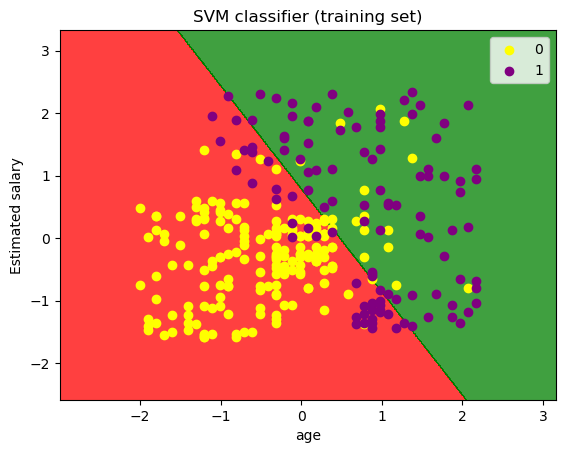

In [7]:
#visualising the training set results
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train

X1,X2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

mtp.contourf(X1,X2,classifier.predict(nm.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
mtp.xlim(X1.min(),X1.max())
mtp.ylim(X2.min(),X2.max())

for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                color=ListedColormap(('yellow','purple'))(i),label=j)
    
mtp.title("SVM classifier (training set)")
mtp.xlabel('age')
mtp.ylabel('Estimated salary')
mtp.legend()
mtp.show()

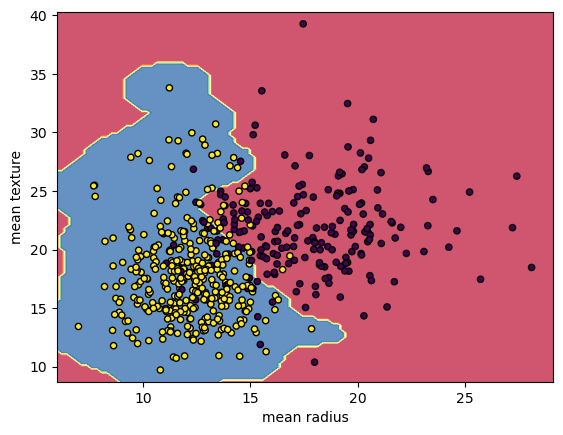

In [8]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

#load the datsets
cancer=load_breast_cancer()
X=cancer.data[:,:2]
y=cancer.target

#build model
svm=SVC(kernel="rbf",gamma=0.5,C=1.0)

#trained the model
svm.fit(X,y)

#plot Decision BOundary
DecisionBoundaryDisplay.from_estimator(svm,X,response_method="predict",cmap=plt.cm.Spectral,
                                       alpha=0.8,xlabel=cancer.feature_names[0],
                                      ylabel=cancer.feature_names[1])

#scatter plot
plt.scatter(X[:,0],X[:,1],c=y,s=20,edgecolors="k")
plt.show()

In [9]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=109)

In [10]:

#build model
svm=SVC(kernel="rbf",gamma=0.5,C=1.0)

#trained the model
svm.fit(X_train,y_train)

SVC(gamma=0.5)

In [11]:
from sklearn import metrics
y_pred=clf.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

NameError: name 'clf' is not defined

In [12]:
#import svm model
from sklearn import svm

#create a svm classifier
clf=svm.SVC(kernel='linear') #linear model

#train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [13]:
from sklearn import metrics
y_pred=clf.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9649122807017544


In [14]:
print("Precission",metrics.precision_score(y_test,y_pred))

print("Recall",metrics.recall_score(y_test,y_pred))

Precission 0.9811320754716981
Recall 0.9629629629629629


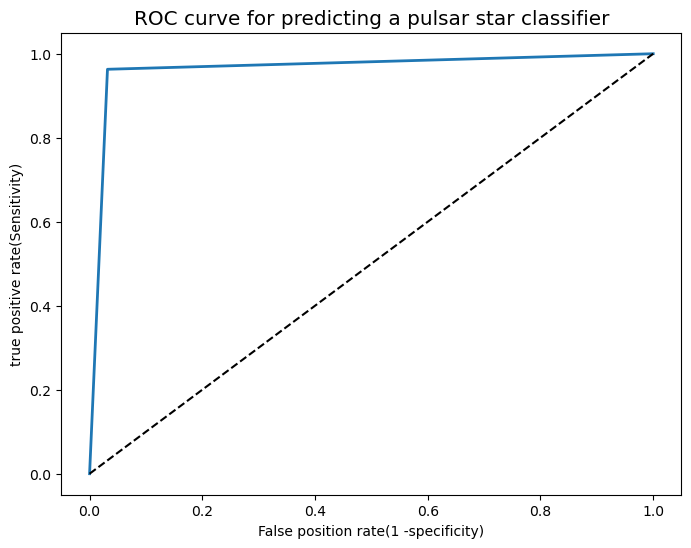

In [15]:
#plot ROC curve'

from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.rcParams['font.size']=12
plt.title('ROC curve for predicting a pulsar star classifier')

plt.xlabel('False position rate(1 -specificity)')

plt.ylabel('true positive rate(Sensitivity)')

plt.show()

In [16]:
from sklearn.metrics import roc_auc_score
ROC_AUC=roc_auc_score(y_test,y_pred)
print("ROC AUC: {:4f}".format(ROC_AUC))

ROC AUC: 0.965608
